---
title: "Forcing Variables to be Categorical"
author: "Damien Martin"
date: "2024-04-28 11:00"
categories: [data-vis, plotnine, snippet]
image: "image.jpg"
description: "Plotnine will treat numeric quantities as continuous, and generators continuous legends. We can use 'factor' to force the variable to be treated as cateogrical."
---

# Problem

Plotnine assumes that numeric variables are continuous, rather than discrete. When plotting, some attributes require discrete / categorical variables (e.g. shape). Some variables can support either continuous or discrete features (e.g. size, colour), but the legends can be clearer for discrete variables.

Examples of where a numeric feature is categorical:

- Cell ids in A/B tests (e.g. cell 1 is control, cell 2 is treatment)
- SKU ids (SKU 542354 and SKU 542355 should not be considered "close", they are two arbitrary numbers that label the products)

The example that I will use here is the number of cylinders in a car in the `mtcars` dataset.

# Solution

Use `"factor(variable_name)"` in the athestics, rather than just `"variable_name"`.

# Example

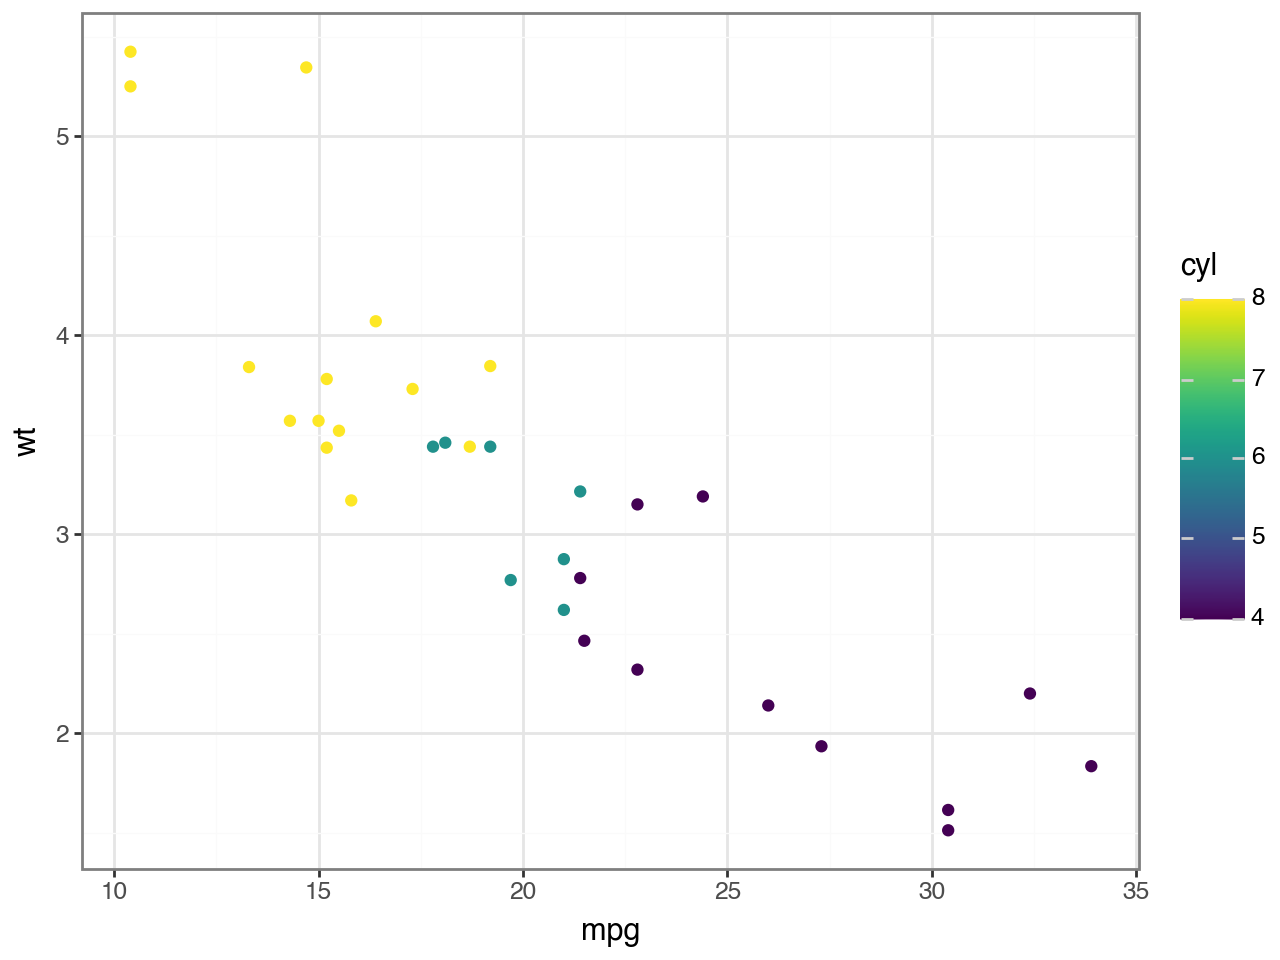

In [4]:
#| fig-cap: "An example that doesn't use factor, so the color shows as a gradient"
import plotnine as p9
from plotnine.data import mtcars 

# Example without factor, cylinders are discrete but the colour scale is 
# continuous 
(
    p9.ggplot(mtcars, p9.aes(x='mpg', y='wt', color='cyl'))
    + p9.geom_point()
    + p9.theme_bw()
)

Using `"factor(cyl)"` to force the integer number of cylinders to be seen as discrete, even though it is a numeric variable. 

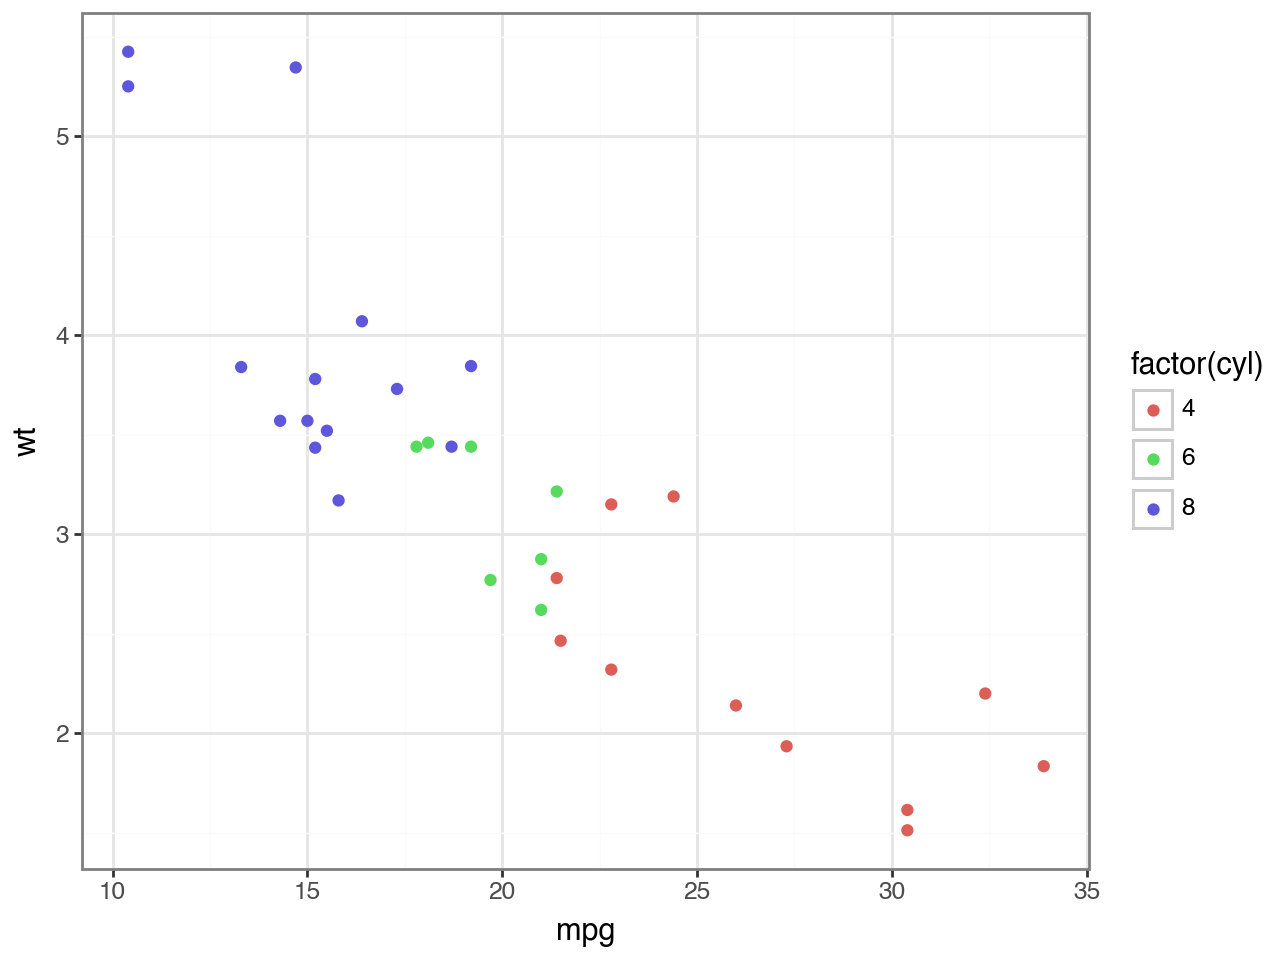

In [5]:
#| fig-cap: "An example using factor; colours show discretely and are easier to identify"
(
    p9.ggplot(mtcars, p9.aes(x='mpg', y='wt', color='factor(cyl)'))
    + p9.geom_point()
    + p9.theme_bw()
)

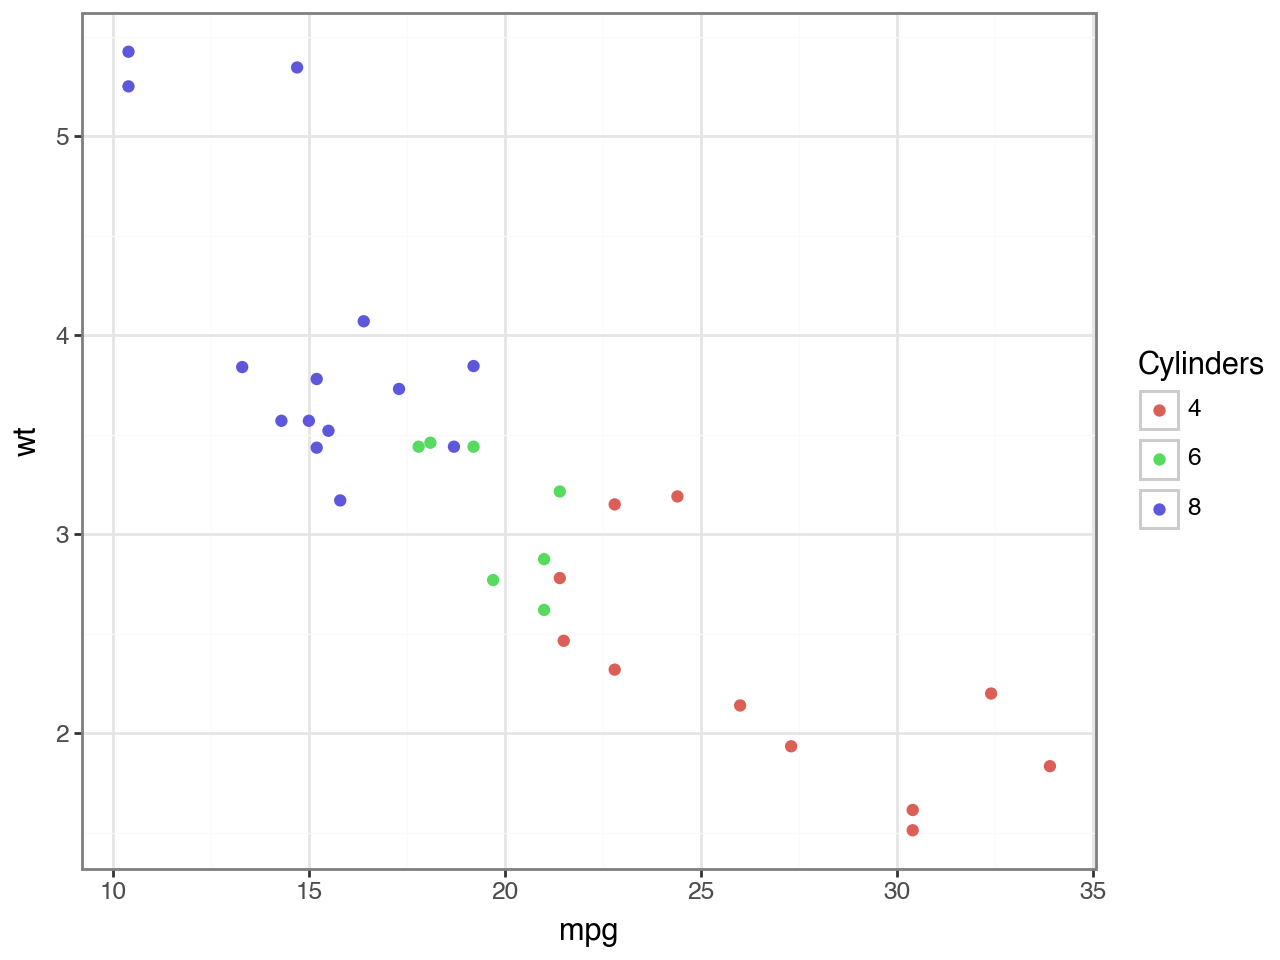

In [9]:
#| fig-cap: "An example using factor and renaming the colour scale to something readable"

(
    p9.ggplot(mtcars, p9.aes(x='mpg', y='wt', color='factor(cyl)'))
    + p9.geom_point()
    + p9.theme_bw()
    + p9.scale_color_discrete(name="Cylinders")
)